# Fruit Freshness Classification (Fresh vs Rotten)

## Proper Project Goal

The goal of this project is to build a CNN-based deep learning model that classifies fruit images as Fresh or Rotten. The model is trained on Apple, Banana, and Strawberry images and supports image-file prediction as well as real-time live camera prediction, helping in automatic quality inspection and food waste reduction

## Imports Libraries

In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping

## Parameters & Dataset Path

In [2]:
DATASET_PATH = r"C:\Users\rupes\Downloads\Fruit_ Freshness_ dataset1\Fruit Freshness dataset\Fruit Freshness Dataset\Fruit Freshness Dataset"
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
EPOCHS = 20

## Data Augmentation + Validation Split

In [3]:
datagen = ImageDataGenerator(
rescale=1./255,
validation_split=0.2,
rotation_range=20,
zoom_range=0.2,
horizontal_flip=True
)

## Load Training & Validation Data

In [4]:
train_data = datagen.flow_from_directory(
DATASET_PATH,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode="binary",
subset="training",
shuffle=True
)


val_data = datagen.flow_from_directory(
DATASET_PATH,
target_size=IMG_SIZE,
batch_size=BATCH_SIZE,
class_mode="binary",
subset="validation",
shuffle=False
)


print("Class Indices:", train_data.class_indices)

Found 424 images belonging to 2 classes.
Found 105 images belonging to 2 classes.
Class Indices: {'Fresh': 0, 'Rotten': 1}


## CNN Model 

In [5]:
model = Sequential([
Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
MaxPooling2D(2,2),


Conv2D(64, (3,3), activation='relu'),
MaxPooling2D(2,2),


Conv2D(128, (3,3), activation='relu'),
MaxPooling2D(2,2),


Flatten(),
Dense(128, activation='relu'),
Dropout(0.5),
Dense(1, activation='sigmoid')
])

## Compile Model

In [6]:
model.compile(
optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy']
)

## Train Model

In [7]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/20
27/27 [==============================] - 40s 1s/step - loss: 0.5940 - accuracy: 0.7524 - val_loss: 0.3256 - val_accuracy: 0.8857
Epoch 2/20
27/27 [==============================] - 36s 1s/step - loss: 0.3462 - accuracy: 0.8703 - val_loss: 0.3792 - val_accuracy: 0.8286
Epoch 3/20
27/27 [==============================] - 36s 1s/step - loss: 0.3272 - accuracy: 0.8797 - val_loss: 0.2818 - val_accuracy: 0.9048
Epoch 4/20
27/27 [==============================] - 36s 1s/step - loss: 0.3182 - accuracy: 0.8821 - val_loss: 0.7400 - val_accuracy: 0.8000
Epoch 5/20
27/27 [==============================] - 36s 1s/step - loss: 0.2548 - accuracy: 0.9009 - val_loss: 0.4015 - val_accuracy: 0.8190
Epoch 6/20
27/27 [==============================] - 34s 1s/step - loss: 0.2592 - accuracy: 0.8939 - val_loss: 0.2454 - val_accuracy: 0.9143
Epoch 7/20
27/27 [==============================] - 34s 1s/step - loss: 0.1972 - accuracy: 0.9033 - val_loss: 0.3067 - val_accuracy: 0.8381
Epoch 8/20
27/27 [==

## Accuracy Graph

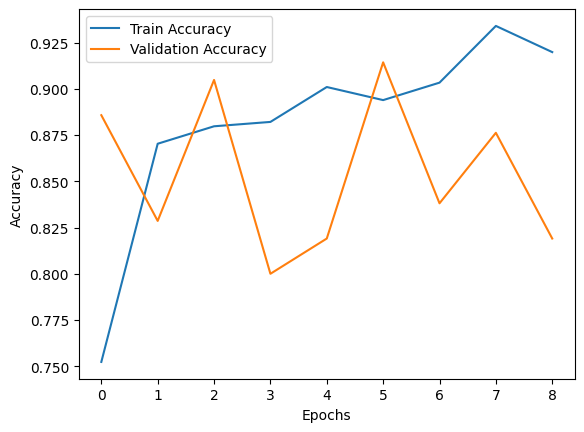

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save Trained Model

In [9]:
model.save("fruit_freshness_model.h5")

## Image File Prediction

In [10]:
def predict_fruit(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_arr = image.img_to_array(img) / 255.0
    img_arr = np.expand_dims(img_arr, axis=0)

    prediction = model.predict(img_arr)[0][0]

    rotten_percent = prediction * 100
    fresh_percent = (1 - prediction) * 100

    if prediction < 0.5:
        result = "FRESH FRUIT"
    else:
        result = "ROTTEN FRUIT"

    print("Result:", result)
    print(f"Fresh Percentage : {fresh_percent:.2f}%")
    print(f"Rotten Percentage: {rotten_percent:.2f}%")

    plt.imshow(img)
    plt.title(result)
    plt.axis("off")


##  Test with Any Image

1/1 [==============================] - 0s 252ms/step
Result: FRESH FRUIT
Fresh Percentage : 84.06%
Rotten Percentage: 15.94%


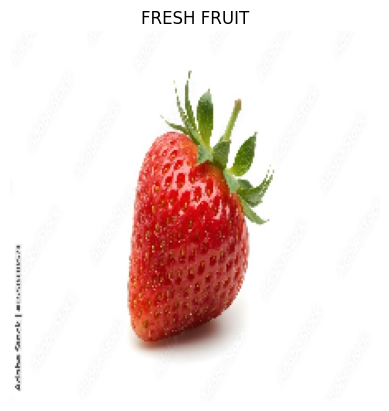

In [11]:
predict_fruit(r"C:\Users\rupes\Downloads\Fruit_ Freshness_ dataset1\Fruit Freshness dataset\Fruit Freshness Dataset\Fruit Freshness Dataset\Fresh\strawberry\strawberry_fresh_005.jpg (97).jpg")

1/1 [==============================] - 0s 75ms/step
Result: ROTTEN FRUIT
Fresh Percentage : 26.78%
Rotten Percentage: 73.22%


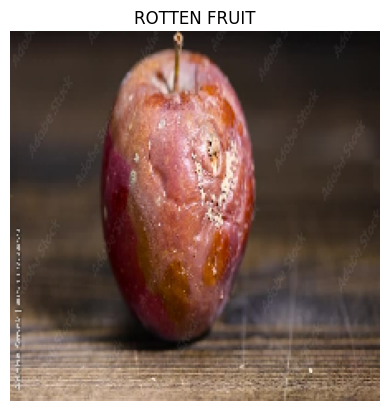

In [12]:
predict_fruit(r"C:\Users\rupes\Downloads\Fruit_ Freshness_ dataset1\Fruit Freshness dataset\Fruit Freshness Dataset\Fruit Freshness Dataset\Rotten\apple\apple_rotten_001.jpg (29).jpg")

## Live Camera

In [13]:
IMG_SIZE = (224, 224)
cap = cv2.VideoCapture(0)
print("Camera started... Press Q to quit")
while True:
    ret, frame = cap.read()
    if not ret:
        break
  # Preprocess frame
    img = cv2.resize(frame, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
     # Prediction
    prediction = model.predict(img, verbose=0)[0][0]
    rotten_percent = prediction * 100
    fresh_percent = (1 - prediction) * 100
    
    if prediction < 0.5:
        label = "FRESH"
        color = (0, 255, 0)
    else:
        label = "ROTTEN"
        color = (0, 0, 255)

    # Display text
    cv2.putText(frame, f"Result: {label}", (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    cv2.putText(frame, f"Fresh: {fresh_percent:.2f}%", (20, 80),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    cv2.putText(frame, f"Rotten: {rotten_percent:.2f}%", (20, 120),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    cv2.imshow("Fruit Freshness Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
print("Camera closed")


Camera started... Press Q to quit
Camera closed
